In [113]:
from sklearn.model_selection import train_test_split, KFold 
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, precision_recall_curve,f1_score, fbeta_score, roc_auc_score
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils.class_weight import compute_class_weight


In [2]:
with open('df.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,schedule_hour,schedule_day,appointment_day,day_difference,appointment_weekday,schedule_weekday,prior_appointments,prior_noshows,total_conditions
2149,1.0,40,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,29,29,31.0,5.0,2.0,0,0.0,0.0
2154,1.0,25,0.0,0.0,0.0,0.0,0.0,1.0,1.0,16,29,29,31.0,5.0,2.0,0,0.0,0.0
2155,1.0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,28,29,1.0,5.0,4.0,0,0.0,0.0
2158,1.0,58,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,29,29,31.0,5.0,2.0,0,0.0,0.0
2161,0.0,23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,29,29,31.0,5.0,2.0,0,0.0,0.0


In [4]:
pd.options.display.max_rows = 4000
df.groupby('no_show').describe().transpose()

no_show                             0.0           1.0
gender              count  49779.000000  12495.000000
                    mean       0.643364      0.640336
                    std        0.479011      0.479921
                    min        0.000000      0.000000
                    25%        0.000000      0.000000
                    50%        1.000000      1.000000
                    75%        1.000000      1.000000
                    max        1.000000      1.000000
age                 count  49779.000000  12495.000000
                    mean      37.521585     33.505642
                    std       23.858740     21.885501
                    min        0.000000      0.000000
                    25%       17.000000     16.000000
                    50%       38.000000     32.000000
                    75%       57.000000     50.000000
                    max      115.000000     97.000000
scholarship         count  49779.000000  12495.000000
                    mean       0.088913      0.108924
                    std        0.284621      0.311556
                    min        0.000000      0.000000
                    25%        0.000000      0.000000
                    50%        0.000000      0.000000
                    75%        0.000000      0.000000
                    max        1.000000      1.000000
hypertension        count  49779.000000  12495.000000
                    mean       0.206211      0.157423
                    std        0.404588      0.364214
                    min        0.000000      0.000000
                    25%        0.000000      0.000000
                    50%        0.000000      0.000000
                    75%        0.000000      0.000000
                    max        1.000000      1.000000
diabetes            count  49779.000000  12495.000000
                    mean       0.073565      0.060104
                    std        0.261065      0.237689
                    min        0.000000      0.000000
                    25%        0.000000      0.000000
                    50%        0.000000      0.000000
                    75%        0.000000      0.000000
                    max        1.000000      1.000000
alcoholism          count  49779.000000  12495.000000
                    mean       0.022801      0.029532
                    std        0.149269      0.169298
                    min        0.000000      0.000000
                    25%        0.000000      0.000000
                    50%        0.000000      0.000000
                    75%        0.000000      0.000000
                    max        1.000000      1.000000
handicap            count  49779.000000  12495.000000
                    mean       0.019104      0.014486
                    std        0.136894      0.119487
                    min        0.000000      0.000000
                    25%        0.000000      0.000000
                    50%        0.000000      0.000000
                    75%        0.000000      0.000000
                    max        1.000000      1.000000
sms                 count  49779.000000  12495.000000
                    mean       0.317905      0.474110
                    std        0.465667      0.499349
                    min        0.000000      0.000000
                    25%        0.000000      0.000000
                    50%        0.000000      0.000000
                    75%        1.000000      1.000000
                    max        1.000000      1.000000
schedule_hour       count  49779.000000  12495.000000
                    mean      10.571506     11.104922
                    std        3.189138      3.191370
                    min        6.000000      6.000000
                    25%        8.000000      8.000000
                    50%       10.000000     11.000000
                    75%       13.000000     14.000000
                    max       21.000000     21.000000
schedule_day        count  49779.000000  12495.000000
    

# EDA

In [5]:
df.no_show.value_counts(normalize=True) ##about 20% of patients won't show up

0.0    0.799354
1.0    0.200646
Name: no_show, dtype: float64

In [6]:
df.describe()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show,schedule_hour,schedule_day,appointment_day,day_difference,appointment_weekday,schedule_weekday,prior_appointments,prior_noshows,total_conditions
count,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000,62274.000000
mean,0.642756,36.715804,0.092928,0.196422,0.070864,0.024151,0.018178,0.349247,0.200646,10.678534,14.234319,12.409834,11.227495,2.836513,2.833028,0.773870,0.074670,0.309616
std,0.479191,23.530982,0.290334,0.397295,0.256600,0.153520,0.133595,0.476736,0.400487,3.196706,9.419426,9.191832,16.135783,1.342665,1.367898,1.770302,0.406868,0.615419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,5.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000,9.000000,4.000000,3.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,22.000000,19.000000,17.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,31.000000,31.000000,179.000000,5.000000,5.000000,87.000000,17.000000,4.000000


In [7]:
df_eda = df.copy()

In [8]:
### https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04
### referencing this articles for WoE and IV 

In [9]:
### Binning categorical data 

df_eda['age_bins'] = pd.qcut(df_eda['age'],10, duplicates='drop')
df_eda['schedule_hour_bins'] = pd.qcut(df_eda['schedule_hour'],3, duplicates='drop')
df_eda['schedule_day_bins'] = pd.qcut(df_eda['schedule_day'],4, duplicates='drop')
df_eda['appointment_day_bins'] = pd.qcut(df_eda['appointment_day'],4, duplicates='drop')
df_eda['day_difference_bins'] = pd.qcut(df_eda['day_difference'],5, duplicates='drop')
df_eda['prior_appointments_bins'] = pd.qcut(df_eda['prior_appointments'], 4, duplicates = 'drop')


In [10]:
df_eda.drop(columns = ['age', 'schedule_hour', 'schedule_day', 'appointment_day', 'day_difference',
                       'prior_appointments'], inplace=True)

In [11]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Show': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'No_show': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_show'] = dset['Show'] / dset['Show'].sum()
    dset['Distr_no_show'] = dset['No_show'] / dset['No_show'].sum()
    dset['WoE'] = np.log(dset['Distr_show'] / dset['Distr_no_show'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_show'] - dset['Distr_no_show']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [12]:
for col in df_eda.columns:
    if col == 'no_show': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df_woe_iv, iv = calculate_woe_iv(df_eda, col, 'no_show')
        print(df_woe_iv)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: gender
   Value    All   Show  No_show  Distr_show  Distr_no_show       WoE        IV
1    0.0  22247  17753     4494    0.356636       0.359664 -0.008453  0.000026
0    1.0  40027  32026     8001    0.643364       0.640336  0.004717  0.000014
IV score: 0.00


WoE and IV for column: scholarship
   Value    All   Show  No_show  Distr_show  Distr_no_show       WoE        IV
1    1.0   5787   4426     1361    0.088913       0.108924 -0.202988  0.004062
0    0.0  56487  45353    11134    0.911087       0.891076  0.022208  0.000444
IV score: 0.00


WoE and IV for column: hypertension
   Value    All   Show  No_show  Distr_show  Distr_no_show       WoE        IV
0    0.0  50042  39514    10528    0.793789       0.842577 -0.059648  0.002910
1    1.0  12232  10265     1967    0.206211       0.157423  0.269966  0.013171
IV score: 0.02


WoE and IV for column: diabetes
   Value    All   Show  No_show  Distr_show  Distr_no_show       WoE        IV
0    0.0  57861  46117    

C:\Users\adelweiss\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


    Value    All   Show  No_show  Distr_show  Distr_no_show       WoE  \
7     6.0     13      2       11    0.000040       0.000880 -3.087013   
12   10.0      4      1        3    0.000020       0.000240 -2.480877   
2     2.0    516    152      364    0.003053       0.029132 -2.255538   
4     3.0    162     49      113    0.000984       0.009044 -2.217832   
1     1.0   2412    736     1676    0.014785       0.134134 -2.205200   
6     7.0      9      3        6    0.000060       0.000480 -2.075412   
11    8.0      3      1        2    0.000020       0.000160 -2.075412   
3     5.0     33     12       21    0.000241       0.001681 -1.941880   
5     4.0     58     24       34    0.000482       0.002721 -1.730571   
8    12.0      1      0        1    0.000000       0.000080  0.000000   
14   13.0      1      0        1    0.000000       0.000080  0.000000   
13   17.0      1      0        1    0.000000       0.000080  0.000000   
16   11.0      1      0        1    0.000000       

In [13]:
df = df[['hypertension','sms','prior_noshows','age', 'schedule_hour', 
         'schedule_day', 'day_difference', 'no_show']]

In [14]:
#sns.pairplot(df, hue='no_show')

In [15]:
df.corr()

,hypertension,sms,prior_noshows,age,schedule_hour,schedule_day,day_difference,no_show
hypertension,1.000000,-0.009240,-0.015931,0.513201,-0.037955,-0.001580,-0.016745,-0.049180
sms,-0.009240,1.000000,0.034937,0.020381,0.063555,0.141176,0.408027,0.131221
prior_noshows,-0.015931,0.034937,1.000000,-0.020314,0.032333,0.003857,0.020503,0.228932
age,0.513201,0.020381,-0.020314,1.000000,0.008413,-0.009541,0.043650,-0.068350
schedule_hour,-0.037955,0.063555,0.032333,0.008413,1.000000,0.016815,0.091563,0.066827
schedule_day,-0.001580,0.141176,0.003857,-0.009541,0.016815,1.000000,0.044597,0.053577
day_difference,-0.016745,0.408027,0.020503,0.043650,0.091563,0.044597,1.000000,0.188333
no_show,-0.049180,0.131221,0.228932,-0.068350,0.066827,0.053577,0.188333,1.000000


In [16]:
# ### tried binning the age to see if model performance improved, but looks like its better to leave it 
# bins = range(0,105,5)
# age_labels = range(1,21)

# df['age_categories'] = pd.cut(df['age'], bins, labels=age_labels, include_lowest = True) 
# df.loc[df.age>99, 'age_categories'] = 19 ### add all of those 100 and above to the last category 
# df['age'] = df['age_categories']
# df.drop(columns=['age_categories'])

# Train-Test Split 

In [17]:
X, y = df.drop(['no_show'],axis=1), df['no_show'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
X_train, y_train = np.array(X_train), np.array(y_train) 
kf = KFold(n_splits=5, shuffle=True, random_state = 19)

## Log Regression

In [18]:
log_accuracy = []
log_recall = []
log_precision = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val] 
    
    log_reg = LogisticRegression(solver= 'liblinear')
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    log_reg.fit(scaled_X_trainfold, y_trainfold)
    #y_predict = (log_reg.predict_proba(scaled_X_valfold)[:,1] > 0.22)
    y_predict = log_reg.predict(scaled_X_valfold)
    log_accuracy.append(accuracy_score(y_valfold, y_predict))
    log_recall.append(recall_score(y_valfold, y_predict))
    log_precision.append(precision_score(y_valfold, y_predict))

In [19]:
print(np.mean(log_accuracy))
print(np.mean(log_recall))
print(np.mean(log_precision))

0.8158131433151314
0.133765111575112
0.6955719204501621


## K-Nearest Neighbour

In [20]:
knn_accuracy = []
knn_recall = []
knn_precision = []
knn_roc = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    knn = KNeighborsClassifier(n_neighbors=29) ###seting optimum to an odd number 
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    knn.fit(scaled_X_trainfold, y_trainfold)
    y_predict = knn.predict(scaled_X_valfold)
    
    knn_accuracy.append(accuracy_score(y_valfold, y_predict))
    knn_recall.append(recall_score(y_valfold, y_predict))
    knn_precision.append(precision_score(y_valfold, y_predict))
        
    

In [21]:
print(np.mean(knn_accuracy))
print(np.mean(knn_recall))
print(np.mean(knn_precision))

0.8190247270984538
0.18928845564958027
0.6589771876195176


In [26]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

k_range = list(range(1, 31))
param_dist = dict(n_neighbors=k_range)
rand = RandomizedSearchCV(knn, param_dist, cv=3, scoring='accuracy', verbose=2, random_state=42, n_jobs = -1)
rand.fit(scaled_X_train, y_train)

rand.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   46.8s finished


{'n_neighbors': 28}

## Support Vector Machine

### Code for randomizedsearch CV for tuning hyperparameters

reference: https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

svm_random_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]} #'class_weight':[{0:0.62550473,1:2.49195678}]}

svm_random = RandomizedSearchCV(estimator = svm.SVC(kernel ='rbf'), param_distributions = svm_random_grid,
                                n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
svm_random.fit(scaled_X_train, y_train)
svm_random.best_params_

### Optimised SVM Radial 

Accuracy: 0.821654277792908 <p>
Recall: 0.1535268532949164 <p> 
Precision: 0.7578844329944994 

In [ ]:
svmrbf_accuracy = []
svmrbf_recall = []
svmrbf_precision = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    svm_rbf = svm.SVC(kernel="rbf", gamma=0.1, C=10)
    svm_rbf.fit(scaled_X_trainfold, y_trainfold)
    
    y_predict = svm_rbf.predict(scaled_X_valfold)
    
    svmrbf_accuracy.append(accuracy_score(y_valfold, y_predict))
    svmrbf_recall.append(recall_score(y_valfold, y_predict))
    svmrbf_precision.append(precision_score(y_valfold, y_predict))
   

In [ ]:
print(np.mean(svmrbf_accuracy))
print(np.mean(svmrbf_recall))
print(np.mean(svmrbf_precision))

### Optimised SVM Radial with class weight 

Accuracy: 0.7988117838491379 <p>
Recall: 0.16890676075436756 <p> 
Precision: 0.5501785181618126

In [ ]:
classes = [0,1]
cw = compute_class_weight('balanced', classes, df.no_show)
cw

In [29]:
svmrbf_accuracy = []
svmrbf_recall = []
svmrbf_precision = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    svm_rbf = svm.SVC(kernel="rbf", gamma=0.01, C=0.001, class_weight = {0:0.62550473,1:2.49195678}) 
    svm_rbf.fit(scaled_X_trainfold, y_trainfold)
    
    y_predict = svm_rbf.predict(scaled_X_valfold)
    
    svmrbf_accuracy.append(accuracy_score(y_valfold, y_predict))
    svmrbf_recall.append(recall_score(y_valfold, y_predict))
    svmrbf_precision.append(precision_score(y_valfold, y_predict))

In [30]:
print(np.mean(svmrbf_accuracy))
print(np.mean(svmrbf_recall))
print(np.mean(svmrbf_precision))


0.7574628977477605
0.19504901525778046
0.6394577497400336


# Naive Bayes 

In [27]:
nb_accuracy = []
nb_recall = []
nb_precision = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    nb = GaussianNB()
    nb.fit(scaled_X_trainfold, y_trainfold)

    y_predict = nb.predict(scaled_X_valfold)
    
    nb_accuracy.append(accuracy_score(y_valfold, y_predict))
    nb_recall.append(recall_score(y_valfold, y_predict))
    nb_precision.append(precision_score(y_valfold, y_predict))


In [28]:
print(np.mean(nb_accuracy))
print(np.mean(nb_recall))
print(np.mean(nb_precision))

0.814086945060836
0.1997979921113334
0.6002664846978236


## Random Forest

### Code for randomizedsearch CV for tuning hyperparameters

reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [44]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

random_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
              'class_weight':[{0:0.62550473,1:2.49195678}]}
 
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier() , scoring = 'accuracy', param_distributions = random_grid
                               , n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(scaled_X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.2min finished


{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'class_weight': {0: 0.62550473, 1: 2.49195678}}

In [48]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True,
                       class_weight={0: 0.62550473, 1: 2.49195678},
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=1800, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### Optimised Randomforest 

Accuracy: 0.8249662752586012 <p>
Recall: 0.16894635563896582 <p> 
Precision: 0.7794004157029264 

In [ ]:
rf_accuracy = []
rf_recall = []
rf_precision = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    rf = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, 
                                max_features = 'sqrt', max_depth = 10, n_jobs = -1)
    rf.fit(scaled_X_trainfold, y_trainfold)

    y_predict = rf.predict(scaled_X_valfold)
    
    rf_accuracy.append(accuracy_score(y_valfold, y_predict))
    rf_recall.append(recall_score(y_valfold, y_predict))
    rf_precision.append(precision_score(y_valfold, y_predict))

In [ ]:
print(np.mean(rf_accuracy))
print(np.mean(rf_recall))
print(np.mean(rf_precision))

### Randomforest optimised for class weight

Accuracy: 0.7878117460940285 <p>
Recall: 0.34327949214184883 <p> 
Precision: 0.45657089201211465 

In [49]:
rf_accuracy = []
rf_recall = []
rf_precision = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    rf = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, 
                              max_features = 'sqrt', max_depth = 10, class_weight= {0:0.62550473,1:2.49195678}, n_jobs = -1)
   
    rf.fit(scaled_X_trainfold, y_trainfold)

    y_predict = rf.predict(scaled_X_valfold)
    
    rf_accuracy.append(accuracy_score(y_valfold, y_predict))
    rf_recall.append(recall_score(y_valfold, y_predict))
    rf_precision.append(precision_score(y_valfold, y_predict))

In [50]:
print(np.mean(rf_accuracy))
print(np.mean(rf_recall))
print(np.mean(rf_precision))

0.7871493393480407
0.34342029105110955
0.45457495136780474


### Fitting RF to entire training dataset

In [51]:
### fit RF to entire training set 
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, 
                                max_features = 'sqrt', max_depth = 10, n_jobs = -1)
rf.fit(scaled_X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [122]:
y_predict = ( rf.predict_proba(scaled_X_test)[:, 1] >= 0.38).astype('int')

In [123]:
y_predict

array([0, 0, 1, ..., 0, 0, 0])

ROC AUC score =  0.8239222751255315


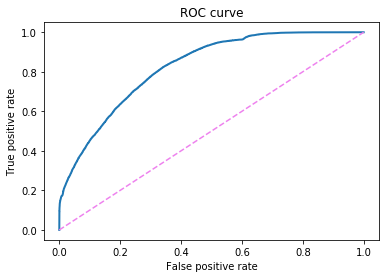

In [124]:
fpr, tpr, thresholds = roc_curve(y_train, rf.predict_proba(scaled_X_train)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_train, rf.predict_proba(scaled_X_train)[:,1]))

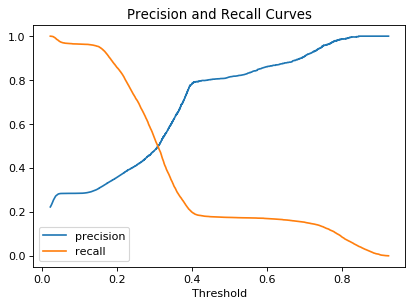

In [125]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, rf.predict_proba(scaled_X_train)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('Precision and Recall Curves');

In [127]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      9882
         1.0       0.67      0.21      0.32      2573

    accuracy                           0.82     12455
   macro avg       0.75      0.59      0.60     12455
weighted avg       0.79      0.82      0.77     12455



In [128]:
svm_rbf = svm.SVC(kernel="rbf", gamma=0.1, C=10)
svm_rbf.fit(scaled_X_train, y_train, probability = True) ### to try this tmr 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
y_predict = ( svm_rbf.predict_proba(scaled_X_test)[:, 1] >= 0.38).astype('int')

AttributeError: predict_proba is not available when  probability=False

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, svm_rbf.predict_proba(scaled_X_train)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_train, svm_rbf.predict_proba(scaled_X_train)[:,1]))

In [ ]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, svm_rbf.predict_proba(scaled_X_train)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('Precision and Recall Curves');

### Misc

In [ ]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_valfold, log_reg.predict_proba(scaled_X_valfold)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.title('Precision and Recall Curves');

In [ ]:
fpr, tpr, thresholds = roc_curve(y_valfold, log_reg.predict_proba(scaled_X_valfold)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_valfold, log_reg.predict_proba(scaled_X_valfold)[:,1]))

In [ ]:
### don't think we will get very good results even if we tune this 

In [ ]:
### even if knn optimised, recall seems bad 

In [ ]:
svmpoly_accuracy = []
svmpoly_recall = []
svmpoly_precision = []

for train, val in kf.split(X_train, y_train):
    X_trainfold, y_trainfold = X_train[train], y_train[train]
    X_valfold, y_valfold = X_train[val], y_train[val]
    
    scaler = StandardScaler()
    scaled_X_trainfold = scaler.fit_transform(X_trainfold)
    scaled_X_valfold = scaler.transform(X_valfold)
    
    svm_poly = svm.SVC(kernel="poly")
    svm_poly.fit(scaled_X_trainfold, y_trainfold)
    
    y_predict = svm_poly.predict(scaled_X_valfold)
    
    svmrbf_accuracy.append(accuracy_score(y_valfold, y_predict))
    svmrbf_recall.append(recall_score(y_valfold, y_predict))
    svmrbf_precision.append(precision_score(y_valfold, y_predict))


In [ ]:
cw